In [1]:
# ======================
# file: Assignment_08.ipynb
# author: KNE-code2023@github
# date: 2023-12-11
# ======================
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./data/CICIDS2017.csv')
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

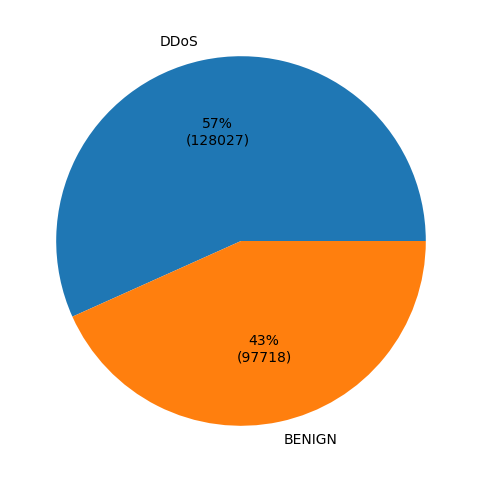

In [44]:
plt.figure(figsize=(6, 6))
plt.pie(dataset[' Label'].value_counts(), labels = dataset[' Label'].value_counts().index, autopct = lambda c: '{:.0f}%\n({:d})'.format(c, int(round(c/100*len(dataset[' Label'])))))
plt.show()

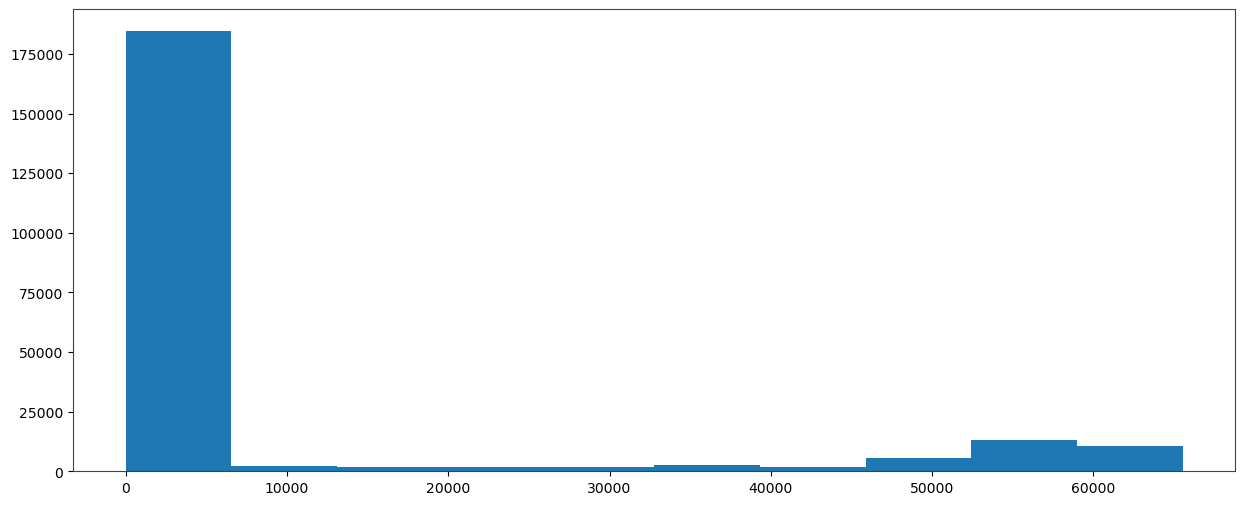

In [46]:
plt.figure(figsize=(15, 6))
dataset[" Destination Port"].hist()
plt.grid()
plt.show()

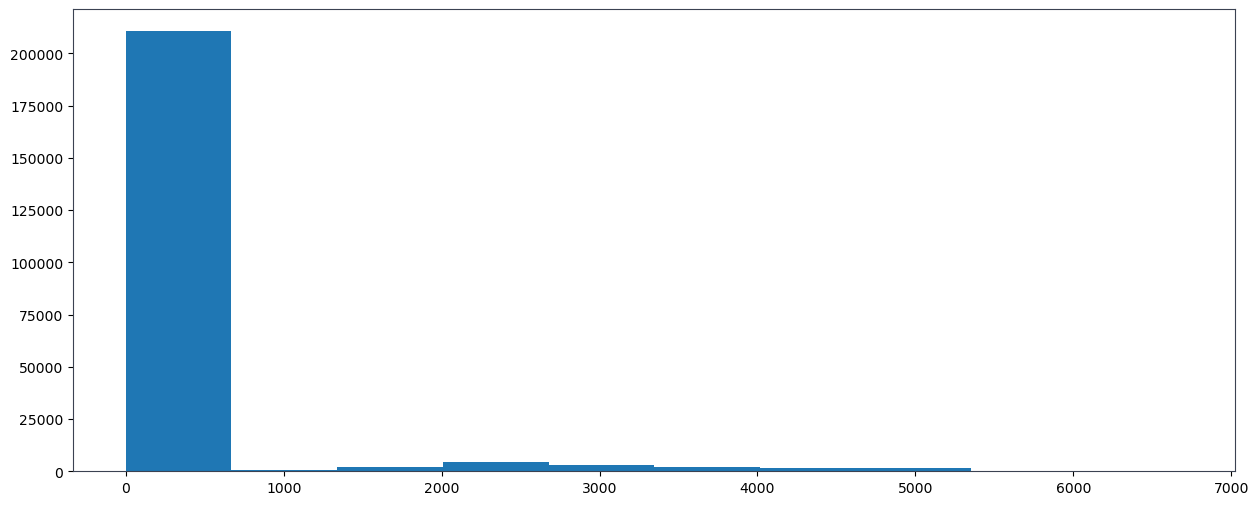

In [47]:
plt.figure(figsize=(15, 6))
dataset[" Fwd Packet Length Std"].hist()
plt.grid()
plt.show()

In [4]:
benign_data = dataset[dataset[' Label'] == 'BENIGN']
ddos_data = dataset[dataset[' Label'] == 'DDoS']

In [48]:
benign_std_dev = benign_data.groupby(' Destination Port')[' Average Packet Size'].std()
ddos_std_dev = ddos_data.groupby(' Destination Port')[' Average Packet Size'].std()

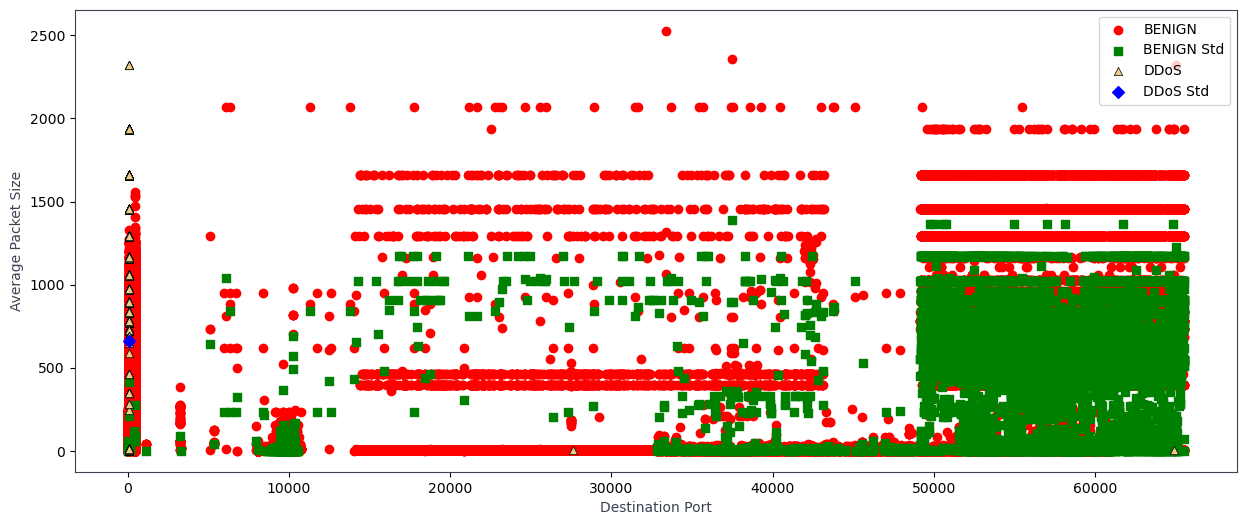

In [49]:
plt.figure(figsize=(15, 6))

plt.scatter(benign_data[' Destination Port'], benign_data[' Average Packet Size'], c='red', marker='o', label='BENIGN')
plt.scatter(benign_std_dev.index + 0.1, benign_std_dev, c='green', marker='s', label='BENIGN Std')
plt.scatter(ddos_data[' Destination Port'], ddos_data[' Average Packet Size'], c='#EBCB8B', marker='^', label='DDoS', edgecolors='black', linewidths=0.5)
plt.scatter(ddos_std_dev.index + 0.1, ddos_std_dev, c='blue', marker='D', label='DDoS Std')

plt.xlabel('Destination Port')
plt.ylabel('Average Packet Size')

plt.legend()
plt.show()

In [50]:
benign_std_dev = benign_data.groupby(' Destination Port')['Fwd Packets/s'].std()
ddos_std_dev = ddos_data.groupby(' Destination Port')['Fwd Packets/s'].std()

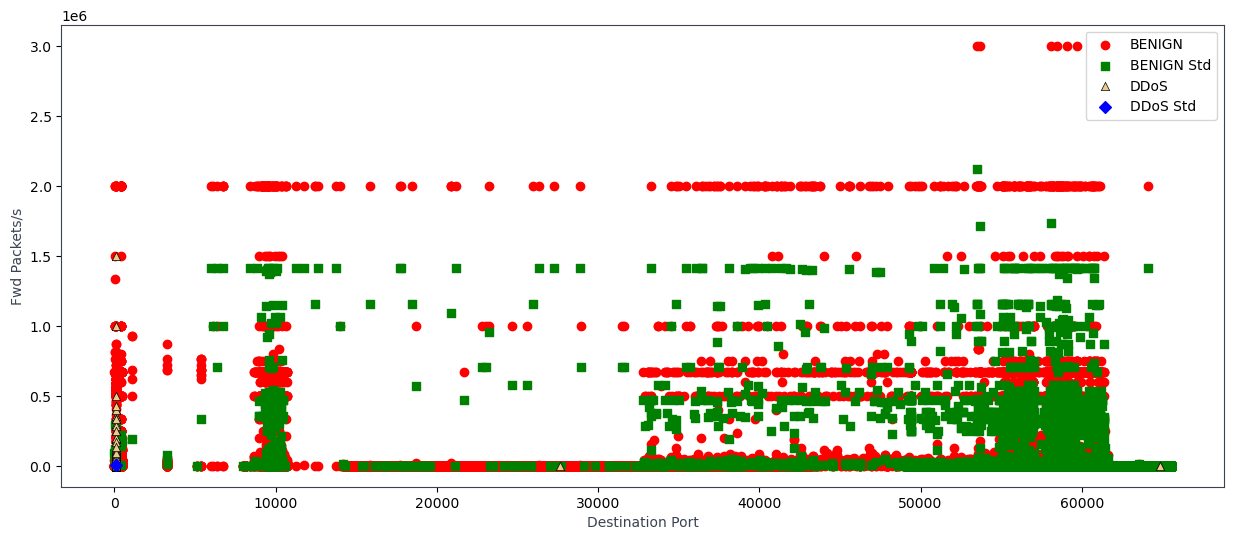

In [51]:
plt.figure(figsize=(15, 6))

plt.scatter(benign_data[' Destination Port'], benign_data['Fwd Packets/s'], c='red', marker='o', label='BENIGN')
plt.scatter(benign_std_dev.index + 0.1, benign_std_dev, c='green', marker='s', label='BENIGN Std')
plt.scatter(ddos_data[' Destination Port'], ddos_data['Fwd Packets/s'], c='#EBCB8B', marker='^', label='DDoS', edgecolors='black', linewidths=0.5)
plt.scatter(ddos_std_dev.index + 0.1, ddos_std_dev, c='blue', marker='D', label='DDoS Std')

plt.xlabel('Destination Port')
plt.ylabel('Fwd Packets/s')

plt.legend()
plt.show()